In [1]:
!pip install nltk

In [2]:
import nltk
import urllib
import bs4 as bs
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from gensim.models import Word2Vec

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Download Data from wikipedia

In [3]:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,"html.parser")
text = ""

for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text
text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

## Show wordcloud before Preprocessing

<Figure size 640x480 with 0 Axes>

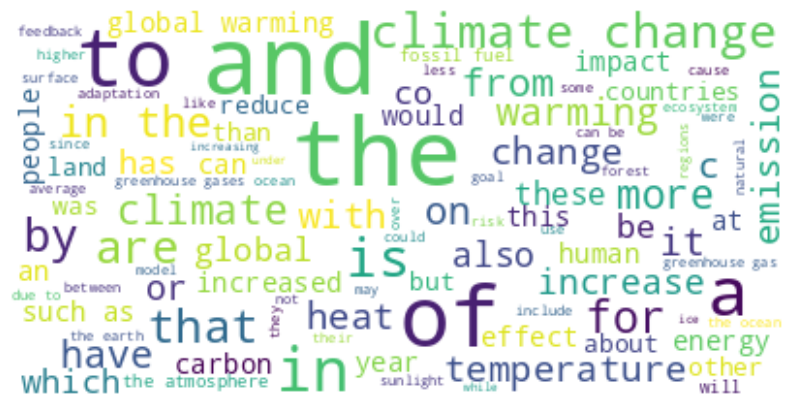

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42,
                        stopwords = [],
                        include_numbers = True).generate(str(text))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Preprocessing Functions

In [34]:
def preprocess_sentence(sentences):
    final_ans = []
    for sentence in sentences:
      words = word_tokenize(sentence)
      punctuation = string.punctuation
      stop_words = set(stopwords.words('english'))
      temp = [word for word in words if (word[0] not in punctuation) and (word not in stop_words)] #Remove punctuation
      lemmatizer = WordNetLemmatizer()
      temp = [lemmatizer.lemmatize(word) for word in temp] #lemmatize
      final_ans.append(temp)
    return final_ans

sentences = sent_tokenize(text)
filtered_corpus = preprocess_sentence(sentences)


## WordCloud after PreProcessing

<Figure size 640x480 with 0 Axes>

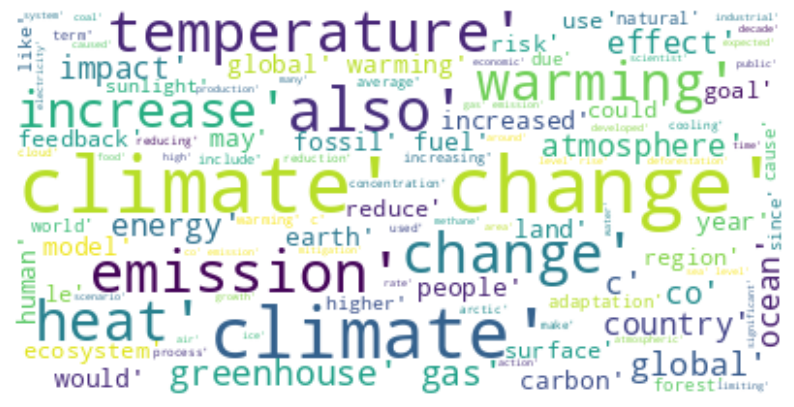

In [37]:
wordcloud = WordCloud(background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=23,
                        stopwords = [],
                        include_numbers = True).generate(str(filtered_corpus))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Training the Word2Vec model
For this part you may want to follow a guide [here](https://rare-technologies.com/word2vec-tutorial/).

In [38]:
filtered_words = filtered_corpus

In [39]:
from gensim.models import Word2Vec

# Create Word2Vec model using filtered_words
model = Word2Vec(filtered_words, window=5, vector_size=50, min_count = 4)

In [40]:
# Print the first 10 most common words. Use model.wv.index_to_key
model.wv.index_to_key[0:10]

['climate',
 'change',
 'warming',
 'global',
 'emission',
 'gas',
 'co',
 'energy',
 'carbon',
 'also']

In [42]:
# Look up the most similar words to word "climat" in your text using the model.wv.most_similar() function, print all similar words
model.wv.most_similar("climate")

[('change', 0.7604564428329468),
 ('increase', 0.7564356327056885),
 ('warming', 0.7304260730743408),
 ('energy', 0.7279632091522217),
 ('temperature', 0.6976814270019531),
 ('fuel', 0.6958264112472534),
 ('greenhouse', 0.6838754415512085),
 ('many', 0.6665241122245789),
 ('level', 0.6635383367538452),
 ('gas', 0.661184549331665)]

In [43]:
# Find and print the vector of word "climate"
model.wv["climate"]

array([ 5.9544975e-03, -8.1220307e-05,  1.6122218e-02,  9.4678178e-03,
       -1.6839050e-02, -4.6519980e-02,  3.9533641e-02,  5.2093495e-02,
       -4.0818539e-02, -1.2193312e-02,  1.8343253e-02, -2.5743723e-02,
        7.0989109e-03,  2.3904512e-02, -1.8564636e-02,  1.1202461e-02,
        6.0144933e-03,  5.2472469e-03, -4.9308557e-02, -3.5301514e-02,
        2.3202410e-02,  2.3545288e-02,  3.4819599e-02, -7.5835637e-03,
        3.2279644e-02, -3.3438781e-03, -1.5185897e-02,  1.2370468e-02,
       -3.5154346e-02, -7.0244675e-03, -8.4592542e-03, -2.4368725e-04,
        8.4335050e-03, -1.6395697e-02, -1.9103263e-02,  1.3583070e-02,
        4.6907037e-02, -4.8480602e-03,  1.2506553e-02, -3.0927425e-02,
        4.2064656e-03,  1.1859470e-02, -2.1089284e-02,  2.7984015e-03,
        4.2798638e-02, -3.6963599e-03, -2.3636283e-02,  2.7599758e-03,
        2.9533664e-02,  1.4445257e-02], dtype=float32)

## Lets do average word2vec for every sentences

In [50]:
import numpy as np
def avg_word2vec(sentence):
  words = word_tokenize(sentence)
  return np.mean([model.wv[word] for word in words if word in model.wv.index_to_key],axis=0)

In [51]:
final_vectors=[]
for sentence in sentences:
  final_vectors.append(avg_word2vec(sentence))

In [52]:
final_vectors[0]

array([ 9.4897673e-03, -4.5515145e-03,  5.7956227e-03,  4.6471199e-03,
       -5.4078354e-03, -1.9505486e-02,  2.3928154e-02,  2.4457781e-02,
       -2.0562384e-02, -2.5048372e-03,  1.2649754e-03, -8.7403320e-03,
        1.1199447e-02,  4.6869107e-03, -6.2264963e-03,  1.0471829e-02,
        4.8500951e-03, -3.1811253e-03, -2.3092113e-02, -1.4212454e-02,
        8.0880579e-03,  1.1873996e-02,  1.5090500e-02, -1.2439179e-02,
        1.1317532e-02, -2.9061935e-03, -9.0582315e-03, -1.3025031e-04,
       -1.4863809e-02, -1.2247779e-03, -1.6576739e-03,  2.7781294e-03,
       -8.3997205e-04, -4.8445701e-03, -1.2435609e-02,  1.0276544e-02,
        1.8198801e-02, -5.2321083e-03,  6.7089694e-03, -1.4395699e-02,
        9.6087307e-03,  5.4874117e-03, -2.3468863e-03,  6.1798468e-03,
        3.3128425e-02,  6.6501132e-05, -1.3059969e-02, -1.1825616e-02,
        1.5830468e-02,  3.9539225e-03], dtype=float32)

In [53]:
len(final_vectors)

509

In [54]:
len(sentences)

509